<b><h2>Decison Trees and Random Forests- Using a Decison trees to detemine if it will rain in Dun Laoghaire</h2></b><br>
For this I will be using Skitlearn and MetEirean Data. I extracted a daily weather report from my nearest weather station in Dun Loaghaire, County Dublin. 
This was then filtered to only look at data for 2016 and saved as a CSV file.
The objective of this is to predict if - given a set of inputs - if it will indeed rain. <bR>
I added a column in the data file to document the target question - 'Did it rain on the date in question?' 1 for Yes and 0 for No
<bR>
Firstly we will import and inspect the data using Pandas. 


In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import seaborn as sns

%matplotlib inline

input_file = "C:\Users\Glandore\Desktop\Github\Dun_Laoghaire_2016.csv"
df = pd.read_csv(input_file, header = 0)

Lets check the data and see what we have to work with..This can be done using the head method.

In [4]:
df.head(5)

,Date,ind,rain,ind.1,maxt,ind.2,mint,gmin,soil,It_Rained
0,15-jan-2016,4,0.0,0,4.8,0,0.7,-2.0,3.0,0
1,16-jan-2016,0,0.2,0,7.3,0,0.8,-2.5,3.0,1
2,24-feb-2016,4,0.0,0,7.7,1,-0.1,-5.4,3.4,0
3,15-feb-2016,4,0.0,0,6.6,1,-0.1,-3.5,3.5,0
4,18-feb-2016,4,0.0,0,7.6,0,0.3,-5.2,3.5,0


We can look at the data using the describe method

In [5]:
df.describe()

,ind,rain,ind.1,maxt,ind.2,mint,gmin,soil,It_Rained
count,366.000000,366.000000,366.0,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1.103825,1.782514,0.0,13.759563,0.005464,7.940437,5.274044,8.327596,0.551913
std,1.790427,4.045382,0.0,4.824249,0.073821,4.390813,5.048565,5.051806,0.497979
min,0.000000,0.000000,0.0,4.600000,0.000000,-0.100000,-5.400000,0.000000,0.000000
25%,0.000000,0.000000,0.0,9.800000,0.000000,4.025000,1.100000,5.200000,0.000000
50%,0.000000,0.100000,0.0,13.300000,0.000000,8.150000,5.450000,7.900000,1.000000
75%,4.000000,1.975000,0.0,17.600000,0.000000,11.600000,9.500000,12.500000,1.000000
max,4.000000,32.600000,0.0,25.500000,1.000000,18.000000,16.700000,17.900000,1.000000


Looking at this data set we need to remove some redundant columns and round the values to whole numbers as this will reduce the number of model values. This can be done using Pandas using the drop command

In [6]:
df = df.drop('ind', 1)
df = df.drop('ind.1', 1)
df = df.drop('ind.2', 1)

Lets check the data set again using head

In [7]:
df.head(5)

,Date,rain,maxt,mint,gmin,soil,It_Rained
0,15-jan-2016,0.0,4.8,0.7,-2.0,3.0,0
1,16-jan-2016,0.2,7.3,0.8,-2.5,3.0,1
2,24-feb-2016,0.0,7.7,-0.1,-5.4,3.4,0
3,15-feb-2016,0.0,6.6,-0.1,-3.5,3.5,0
4,18-feb-2016,0.0,7.6,0.3,-5.2,3.5,0


<b>Glossary of labels</b>
<br>Rain: rainfall in mm
<br>Maxt: Max temp on that day
<br>Maxt: Min temp on that day
<br>Gmin: Min Gound temp on that day
<br>Soil: Soil temp on that day
<br>It rained: 1 for Yes, 0 for No
<br><br>We will do some basic charting the try and look at the data from a visual point of view. The Seaborn pair plot takes all the numeric based values and then plots them against each other. This way we can easily see if there is a correlation or pattern in the data.

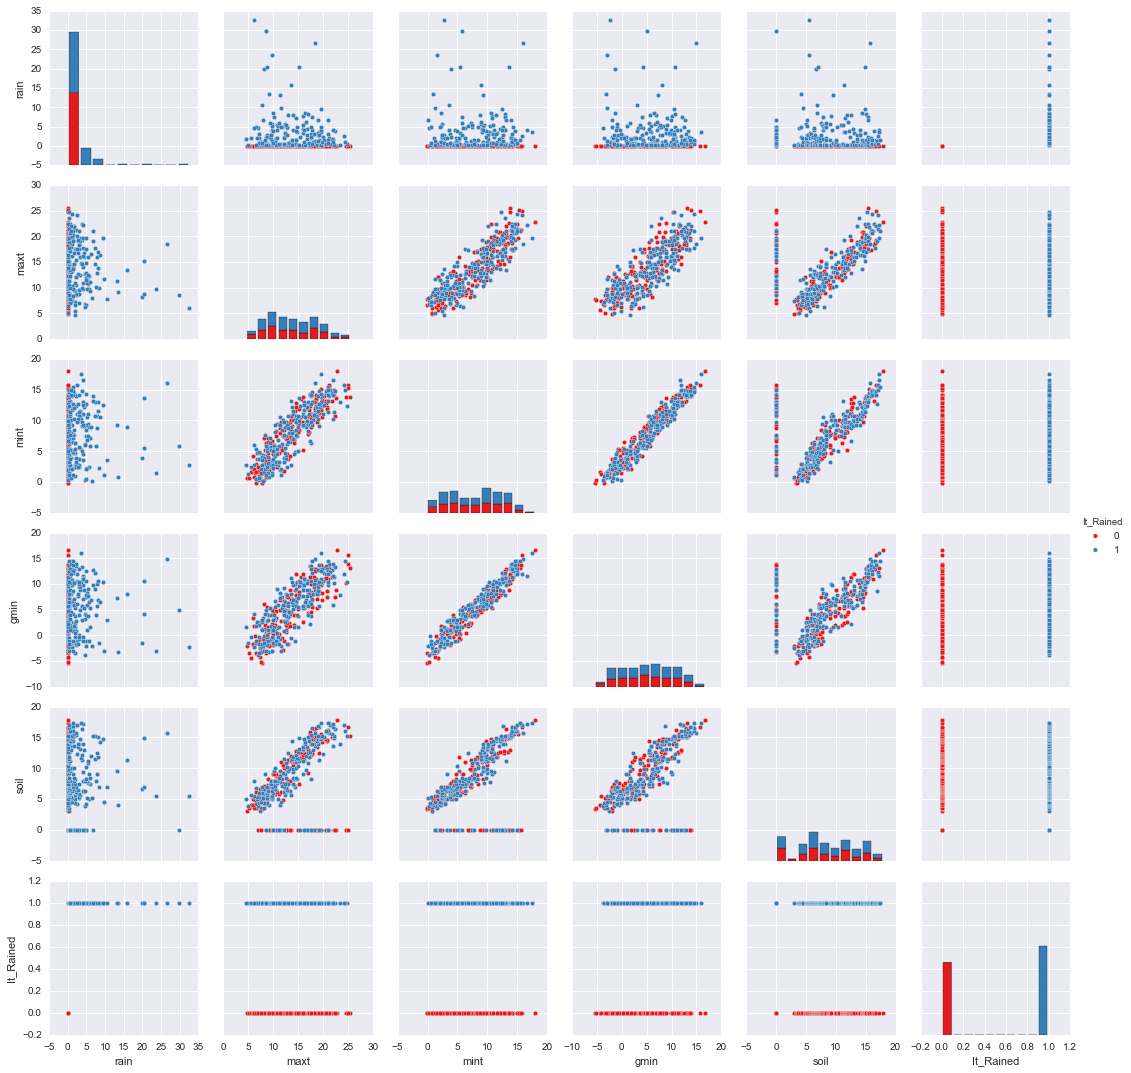

In [8]:
sns.pairplot(df,hue='It_Rained',palette='Set1')

We will want to do some time series analysis so I want to make sure the dates are in good formats. We ca use the Pandas function to_datetime for this. Using dytpes method we see that the date is an object and not a date value so it needs to be fixed.

In [9]:
df.dtypes

Date          object
rain         float64
maxt         float64
mint         float64
gmin         float64
soil         float64
It_Rained      int64
dtype: object

Convert the whole column to see the default date type.

In [10]:
df['Date'] =  pd.to_datetime(df['Date'])

Lets look at the data again - it now has a proper date format

In [11]:
df.dtypes

Date         datetime64[ns]
rain                float64
maxt                float64
mint                float64
gmin                float64
soil                float64
It_Rained             int64
dtype: object

Scikit-learn needs everything to be numerical for decision trees to work. So, so ot make things a bit simpler we will convert all the numbers to whole numbers. This can be done using the astype method.

Looking at the raw data i notice there a few blank values which can cuase trouble later on so it is best to replace blanks with 0 using the fillna method. I also need to remove spaces from this column as it occurs in several places.


In [12]:
df.fillna(value=0).head(5)

,Date,rain,maxt,mint,gmin,soil,It_Rained
0,2016-01-15,0.0,4.8,0.7,-2.0,3.0,0
1,2016-01-16,0.2,7.3,0.8,-2.5,3.0,1
2,2016-02-24,0.0,7.7,-0.1,-5.4,3.4,0
3,2016-02-15,0.0,6.6,-0.1,-3.5,3.5,0
4,2016-02-18,0.0,7.6,0.3,-5.2,3.5,0


In [13]:

df['rain'] = df['rain'].astype(int)
df['maxt'] = df['maxt'].astype(int)
df['mint'] = df['mint'].astype(int)
df['gmin'] = df['gmin'].astype(int)
df['soil'] = df['soil'].astype(int)

Now we will look at the data to validate the data type conversions

In [14]:
df.dtypes

Date         datetime64[ns]
rain                  int32
maxt                  int32
mint                  int32
gmin                  int32
soil                  int32
It_Rained             int64
dtype: object

Scikit-learn needs everything to be numerical for decision trees to work. So, so to make things a bit simpler we will convert all the numbers to whole numbers. This can be done using the astype method.<br>
Looking at the raw data i notice there a few blank values which can cause trouble later on so it is best to replace blanks with 0 using the fillna method. I also need to remove spaces from this column as it occurs in several places.

<h2><b>Creating a training data set</B></h2><br><br>
Now we have a data set that can be used for a decision tree analysis we can start the process for real....
So basically what we need to do is to create a two sets of data X and Y - one for training and one for testing. 
Therefore we want to split the data set into two parts this can be done by using the test_size parameter in the train_test_split method of Sklearn. For this is chose 1/4 split.

In [15]:
features = list(df.columns[1:6])
features

['rain', 'maxt', 'mint', 'gmin', 'soil']

So we use the Ski learn train_test_split module to create 4 groups of data - 2 for testing and 2 for training. We also define what the answer we want is and what the fetaures are. We also state that we want the number of test samples to be 25% of the overall data set.

In [16]:
from sklearn.model_selection import train_test_split

y = df["It_Rained"]
X = df[features]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



<h2><b>Creating the Decision Tree</b></h2><br>

We'll start just by training a single decision tree using the data.

In [17]:
from sklearn.tree import DecisionTreeClassifier

We now need to create an object using the classifer

In [18]:
tree = DecisionTreeClassifier()

Now we want to use the fit method to create our classifier...We apply the training sets we created - the x and y train objects that we created by the train_test_split. This will teach our model what to expect.

In [19]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

The text above give the details of the model that Sklearn has created. More details can be found here 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    

<h2><b>Prediction and Evaluation</b></h2> <br>

So our tree is now created. We need to use some inbuilt functions from Sklearn to assess the accuracy of the model. Using the Sklearn <b>predict</b> function on the X_test data we are trying to see how well the model will match its predictions against the real results (the 25% that we created as the test set earlier) 

In [20]:
pred = tree.predict(X_test)
pred

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

Sklearn has some tools that will allow you the asses the accuracy of the decision tree that you have created. This called the 
<a href = "http://scikit-learn.org/stable/modules/model_evaluation.html">Classfication report</a> and the 

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.65      0.62      0.63        39
          1       0.73      0.75      0.74        53

avg / total       0.69      0.70      0.69        92



In the matrix above we are looking at:
<br><b>Precision</b>: Measures how accurate the out positive (correct) predictions are. Where 1.00 will be the max<br> 
<b>Recall</b>: Measures the fraction of the positives our model indenitifed.<br> 
<b>f1-score</b>: The average between the Precision and Recall scores.<br> 

We can also print a shorter version of the report that is called the confusion_matrix. This basically shows the numbers that the model got correct and how many it got wrong. One fro each level - in this case it rained and it did not rain.

In [23]:
print(confusion_matrix(y_test,pred))

[[24 15]
 [13 40]]


# Random Forests

The main issue that desicion trees tend to be only tend to fit them selfs to the assigend training data and this can lead to 'Overfitting'. One way to to create a large amout of individual trees and then them all 'vote' for the on how to classify the incoming inpuits.
Below we are creating a group of 40 estimators (trees) that will allow a better assessment of the model. 
Rather than training the model on each of all the inputs in the training set, we train each tree on the result of a <b>Bootstrap_sample(inputs)</b>. Since each tree is built using different data, each tree will have a different out come from each of the other trees.

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=40)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

We can then use the RFC object to predict the X test set again.

In [39]:
rfc_pred = rfc.predict(X_test)

Now again we need to print the confusion matrix. 

In [40]:
print(confusion_matrix(y_test,rfc_pred))

[[30  9]
 [15 38]]


In this case it proves that that Model is better in a forest and predicted better results when compared to the training data.

In [41]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.67      0.77      0.71        39
          1       0.81      0.72      0.76        53

avg / total       0.75      0.74      0.74        92



Thanks for reading!